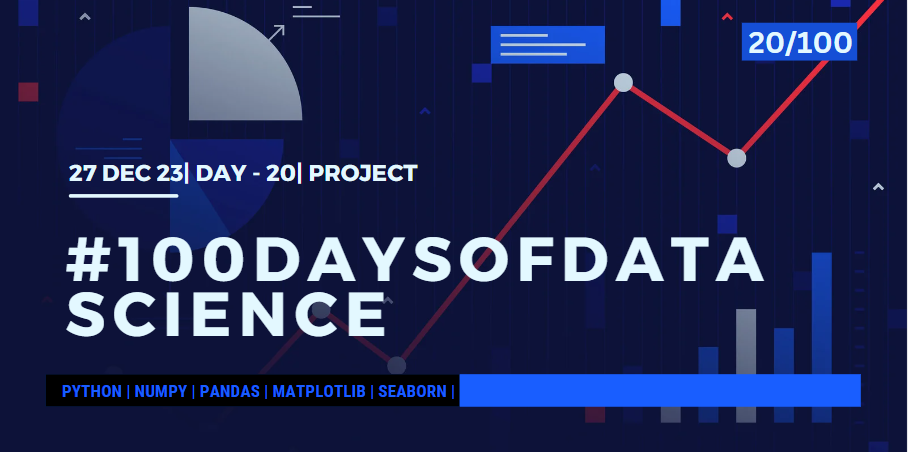

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [29]:
df=pd.read_csv(r'C:\Users\hp\Desktop\100DaysOfDataScience\Day 20\Updated_Zomato_Data.csv', header=0, index_col=0)
df.head()

,restaurant_name,online,reservations,rating,votes,rest_type,cost_for_two,type,location,rating_categories
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,800.0,Buffet,Banashankari,Outstanding
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,800.0,Buffet,Banashankari,Outstanding
2,San Churro Cafe,Yes,No,3.8,918,Other,800.0,Buffet,Banashankari,Satisfactory
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,300.0,Buffet,Banashankari,Satisfactory
4,Grand Village,No,No,3.8,166,Casual Dining,600.0,Buffet,Banashankari,Satisfactory


In [30]:
print("-" * 100)
print("Shape: ",df.shape)
print("-" * 100)
print("Columns: ",df.columns)
print("-" * 100)
print("Info: ")
print(df.info())
print("-" * 100)
print("Describe: ")
print(df.describe())
print("-" * 100)
print("Checking Null values: ")
print(df.isna().sum())
print("-" * 100)

----------------------------------------------------------------------------------------------------
Shape:  (49327, 10)
----------------------------------------------------------------------------------------------------
Columns:  Index(['restaurant_name', 'online', 'reservations', 'rating', 'votes',
       'rest_type', 'cost_for_two', 'type', 'location', 'rating_categories'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Info: 
<class 'pandas.core.frame.DataFrame'>
Index: 49327 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   restaurant_name    49327 non-null  object 
 1   online             49327 non-null  object 
 2   reservations       49327 non-null  object 
 3   rating             49327 non-null  float64
 4   votes              49327 non-null  int64  
 5   rest_type          49327 non-null  object 
 

Text(0, 0.5, 'Number of Restaurants')

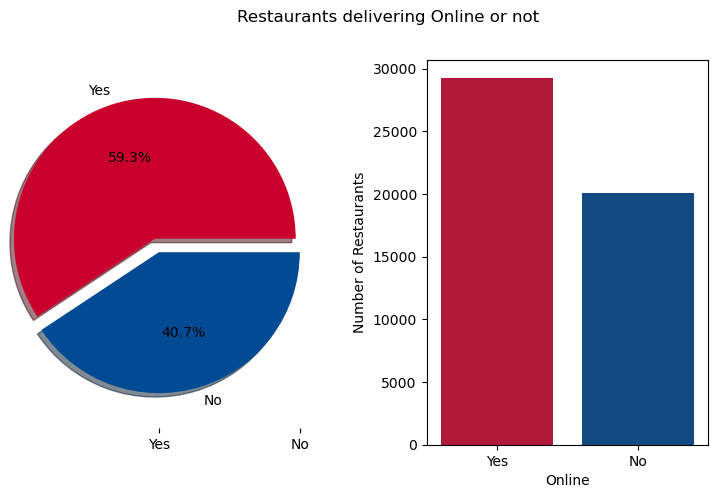

In [169]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8,5))
fig.suptitle('Restaurants delivering Online or not')
labels = df['online'].unique()
sizes = df['online'].value_counts()
myexplode = [0.1, 0]
cols = ['#C9002B', '#004B93']

axes[0].pie(sizes, labels=labels, explode=myexplode, shadow = True, 
       autopct='%1.1f%%',colors=cols)

sns.barplot(ax=axes[1], y=sizes, x=labels,palette=cols)

axes[1].set_xlabel('Online')
axes[1].set_ylabel('Number of Restaurants')

Text(0, 0.5, 'Number of Restaurants')

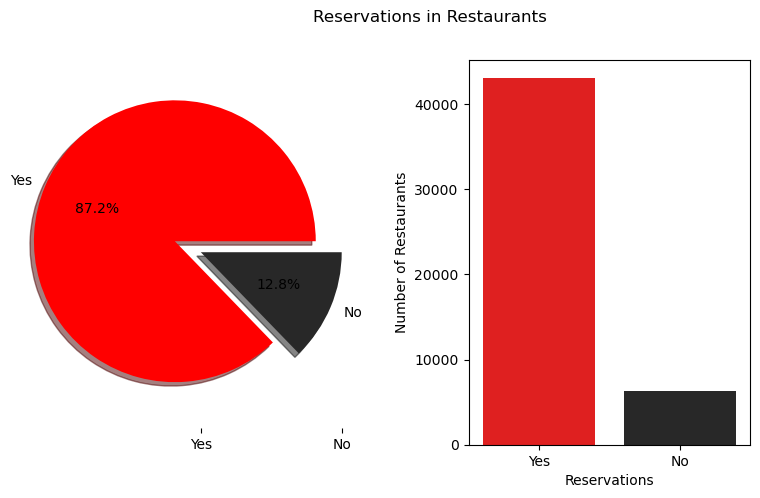

In [191]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8,5))
fig.suptitle('Reservations in Restaurants')
labels = df['reservations'].unique()
sizes = df['reservations'].value_counts()
myexplode = [0.2, 0]
cols = ['#FF0000', '#282828']

axes[0].pie(sizes, labels=labels, explode=myexplode, shadow = True, 
       autopct='%1.1f%%',colors=cols)

sns.barplot(ax=axes[1], y=sizes, x=labels,palette=cols)

axes[1].set_xlabel('Reservations')
axes[1].set_ylabel('Number of Restaurants')

Text(0, 0.5, 'Number of Restaurants')

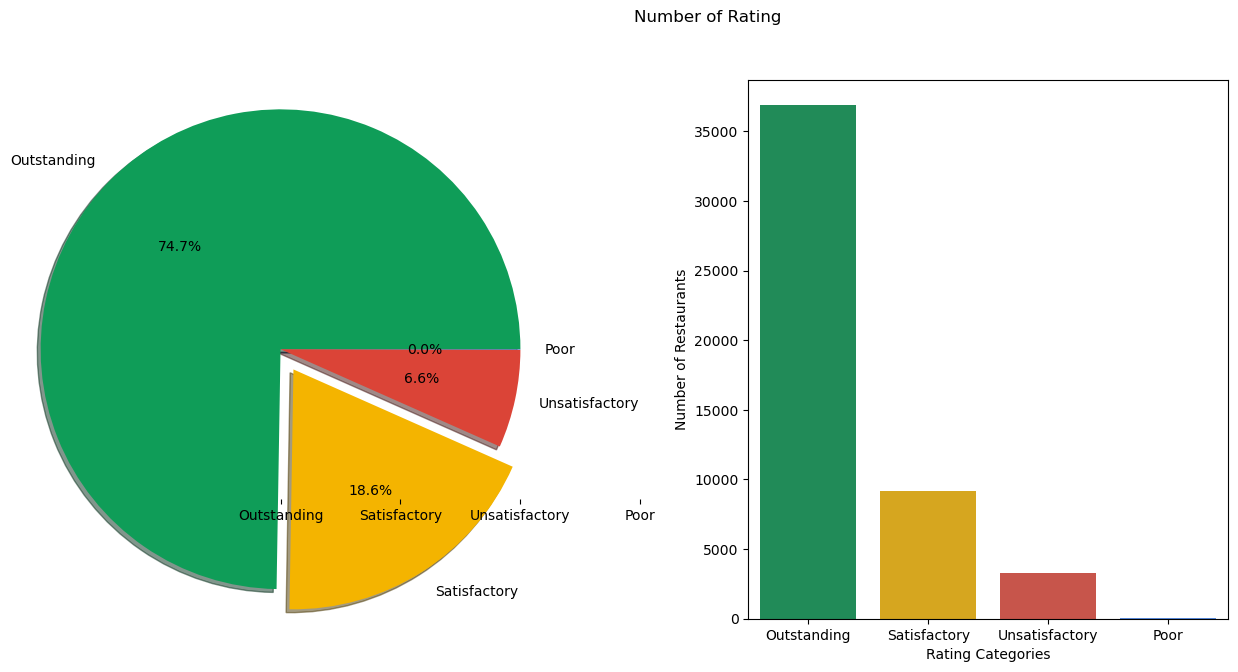

In [227]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,7))
fig.suptitle('Number of Rating')
labels = df['rating_categories'].unique()
sizes = df['rating_categories'].value_counts()
myexplode = [0, 0.2, 0, 0]
cols = ['#0F9D58', '#F4B400', '#DB4437', '#4285F4']

plt.subplots_adjust(wspace=0.1)
axes[0].pie(sizes, labels=labels, explode=myexplode, shadow = True, 
       autopct='%1.1f%%',colors=cols, radius=2)

sns.barplot(ax=axes[1], y=sizes, x=labels,palette=cols)

axes[1].set_xlabel('Rating Categories')
axes[1].set_ylabel('Number of Restaurants')

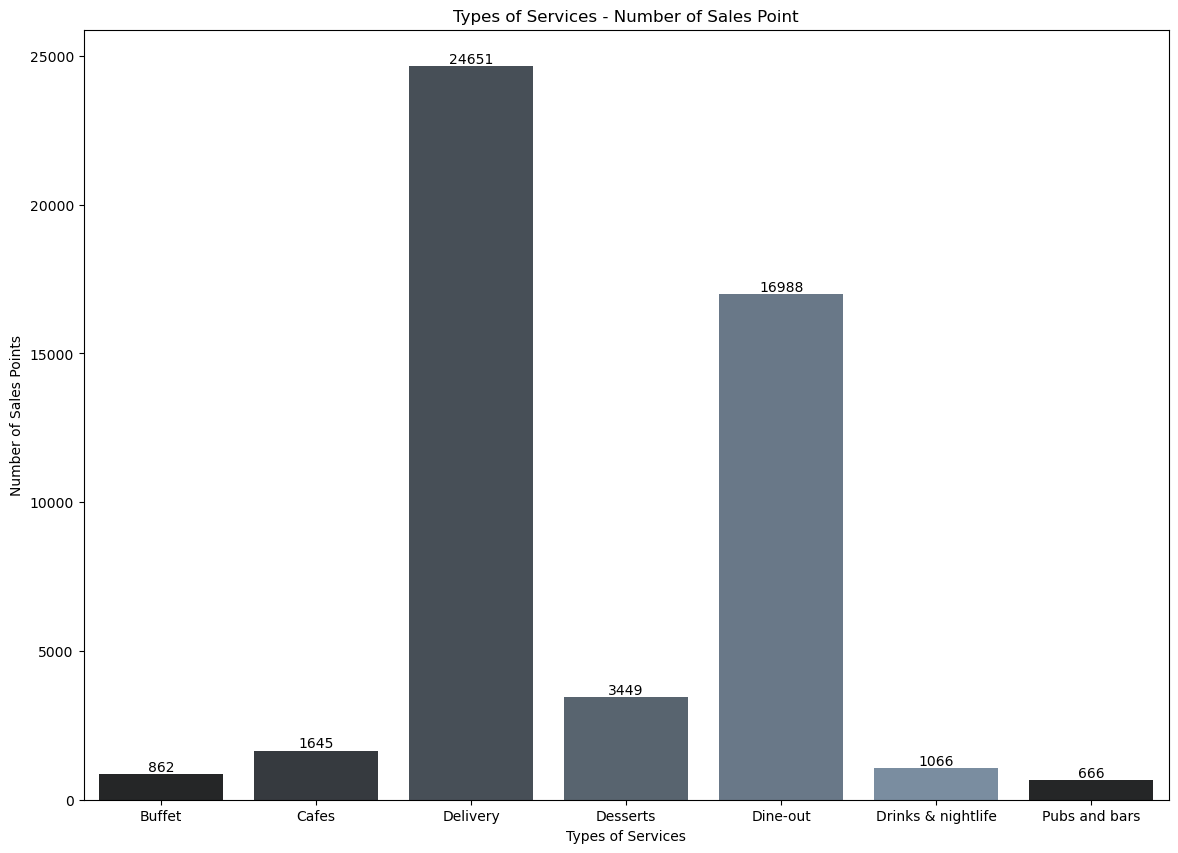

In [125]:
plt.figure(figsize=(14,10))
ax = sns.countplot(x="type",data=df, palette=sns.dark_palette("#748DA6"))
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Types of Services - Number of Sales Point")
plt.xlabel("Types of Services")
plt.ylabel("Number of Sales Points")
plt.show()

<Axes: xlabel='type', ylabel='rating'>

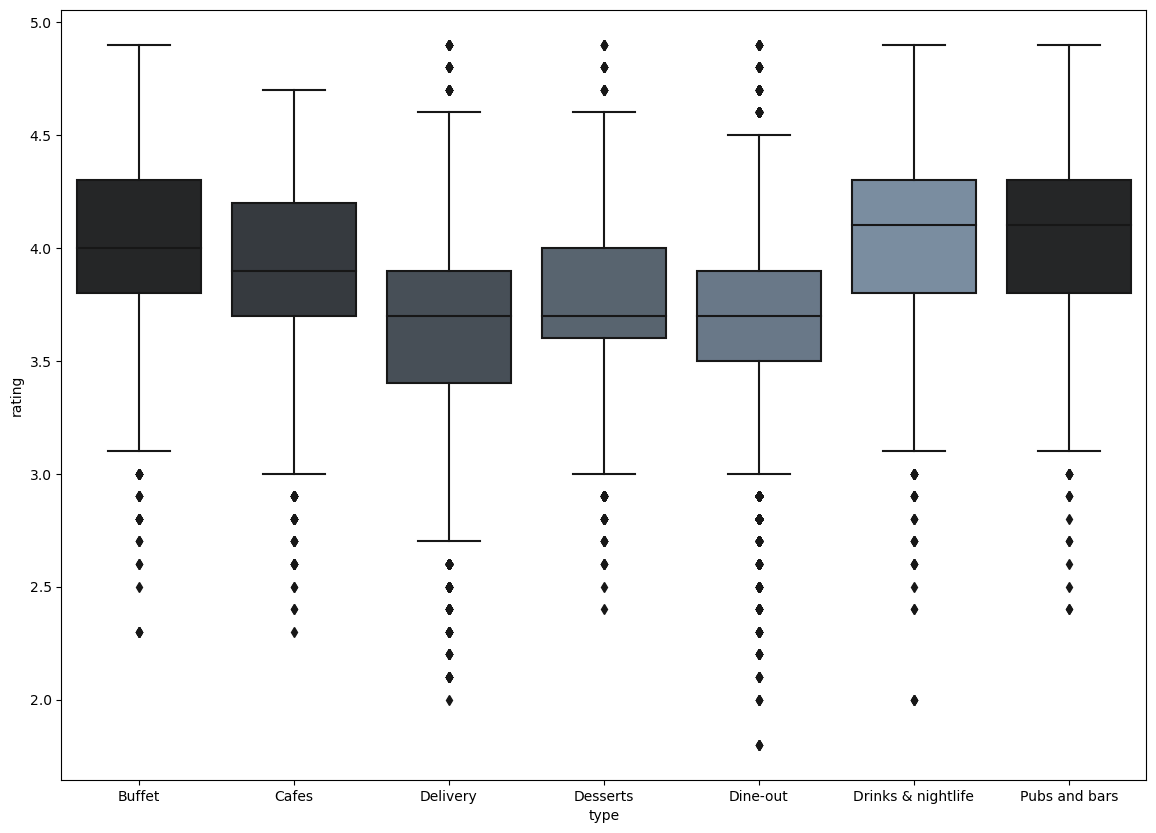

In [231]:
plt.figure(figsize=(14,10))
sns.boxplot(x='type',y='rating',data=df, palette=sns.dark_palette("#748DA6"))

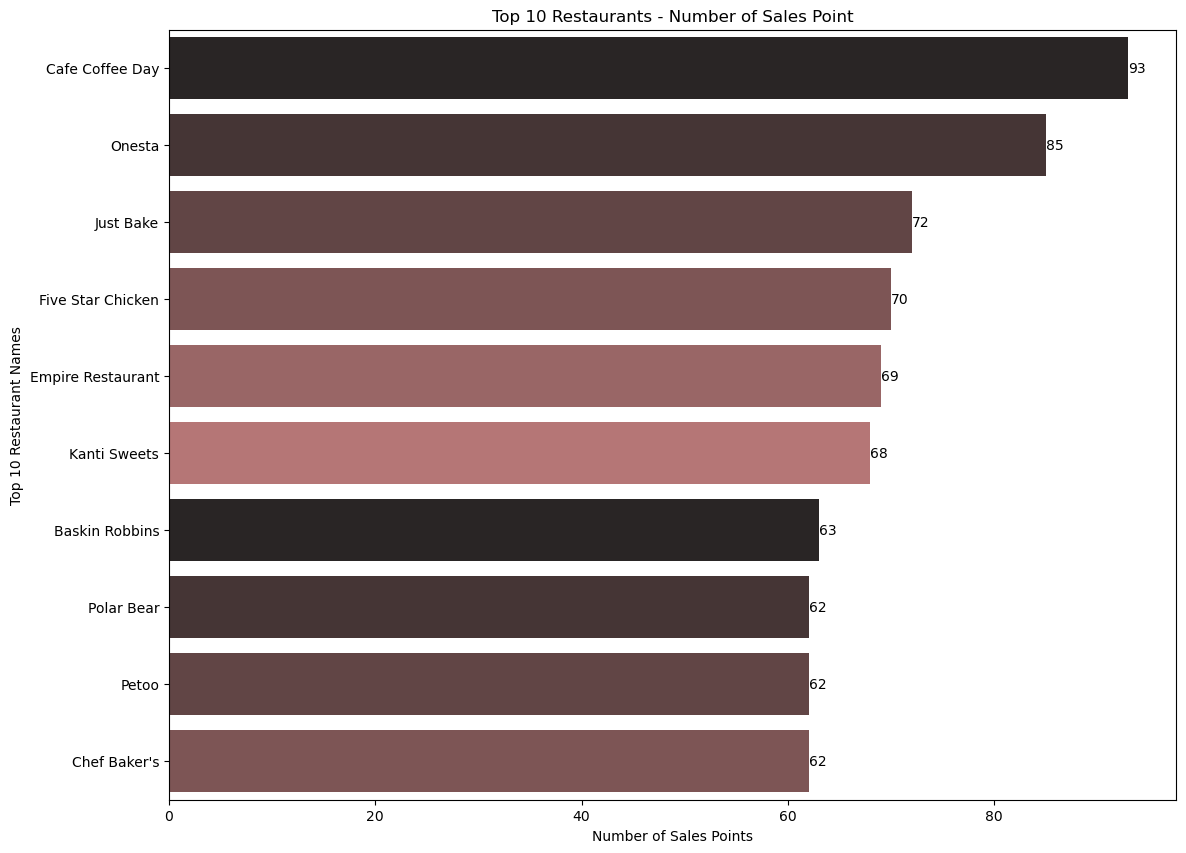

In [100]:
plt.figure(figsize=(13,10)) 
y = df["restaurant_name"].value_counts()[:10]
x = y.index
ax = sns.barplot(x=y,y=x,data=df,estimator="sum", errorbar=None, palette=sns.dark_palette('#C06B6B'))
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Top 10 Restaurants - Number of Sales Point")
plt.ylabel("Top 10 Restaurant Names")
plt.xlabel("Number of Sales Points")
plt.show()

Text(0.5, 1.0, 'Top 10 Restaurants - Average cost(2 people)')

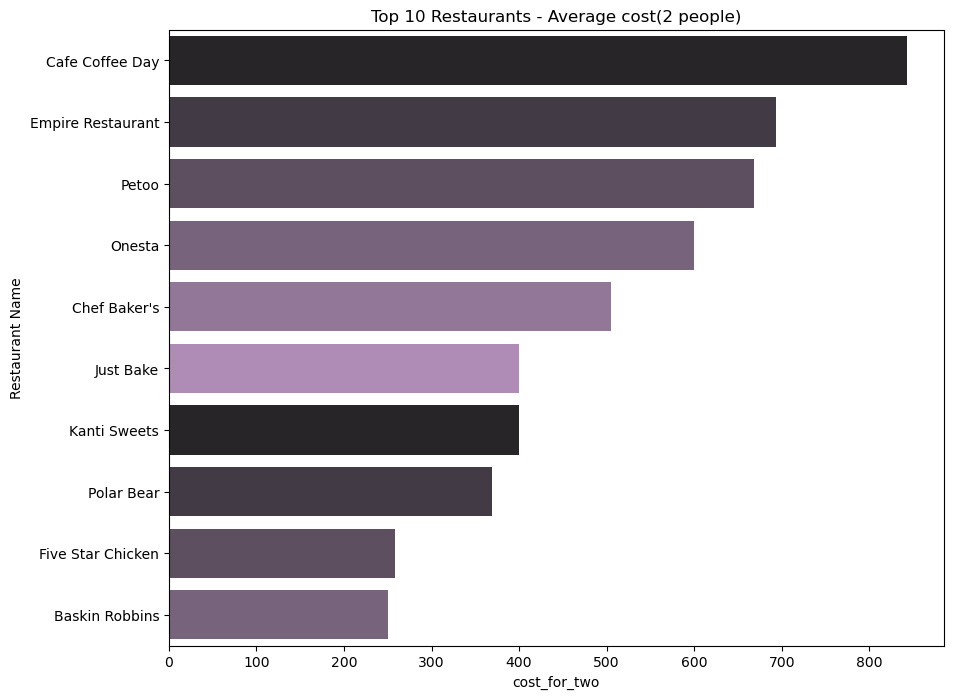

In [232]:
res_cost = df['cost_for_two'].groupby(df['restaurant_name'],sort=True)
dict_1={}
for i,j in df['restaurant_name'].value_counts()[:10].to_dict().items():
    dict_1[i]=round(res_cost.get_group(i).mean(),2)
cost_df = pd.DataFrame(list(dict_1.items()),columns=['Restaurant Name',"cost_for_two"])


fig , ax = plt.subplots(figsize=(10,8))
sns.barplot(data = cost_df.sort_values(by=['cost_for_two'],ascending=False),
            x = 'cost_for_two',y = 'Restaurant Name',palette=sns.dark_palette("#b285bc"))
plt.title('Top 10 Restaurants - Average cost(2 people)')

Text(0.5, 1.0, 'Top 10 Restaurants - Rating')

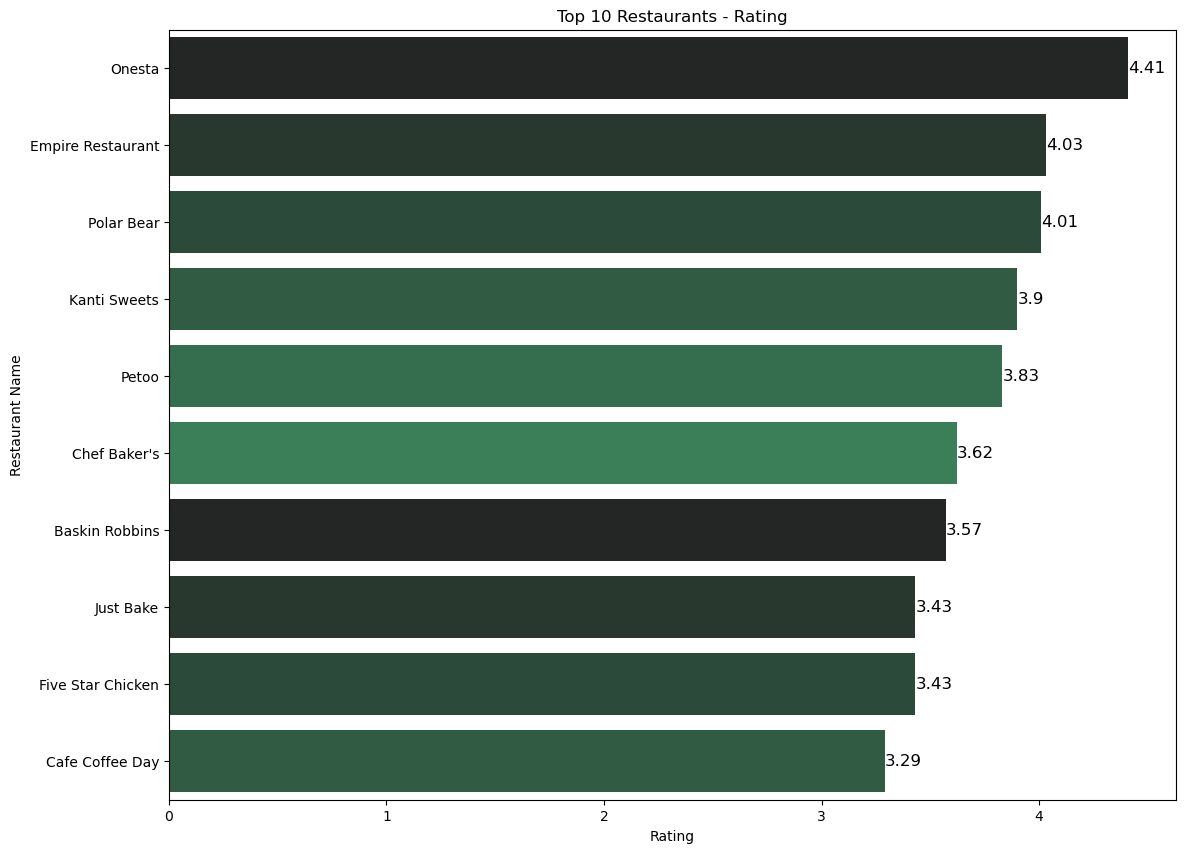

In [233]:
res_rating = df['rating'].groupby(df['restaurant_name'],sort=True)
dict_1={}
for i,j in df['restaurant_name'].value_counts()[:10].to_dict().items():
    dict_1[i]=round(res_rating.get_group(i).mean(),2)
cost_df = pd.DataFrame(list(dict_1.items()),columns=['Restaurant Name',"Rating"])


fig , ax = plt.subplots(figsize=(13,10))
ax1 = sns.barplot(data = cost_df.sort_values(by=['Rating'],ascending=False),
            x = 'Rating',y = 'Restaurant Name',palette=sns.dark_palette("seagreen"), 
            estimator="mean", errorbar=None)
ax1.bar_label(ax.containers[0], fontsize=12)
plt.title('Top 10 Restaurants - Rating')

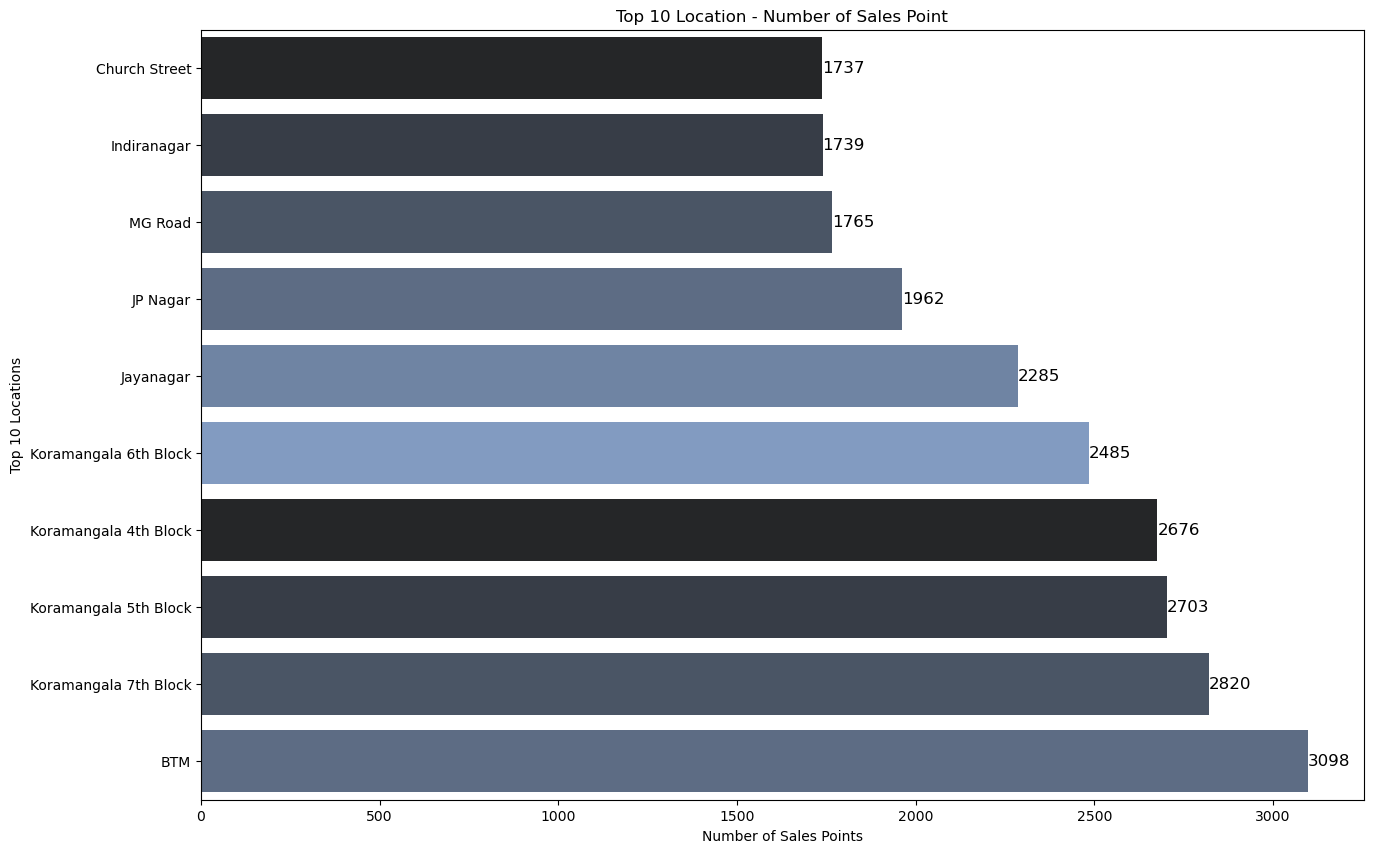

In [234]:
plt.figure(figsize=(15,10)) 
x = df['location'].value_counts()[:10].sort_values()
y = x.index
ax = sns.barplot(x=x,y=y,data=df,estimator="sum", errorbar=None, palette=sns.dark_palette('#79C'))
ax.bar_label(ax.containers[0], fontsize=12)
plt.title("Top 10 Location - Number of Sales Point")
plt.xlabel("Number of Sales Points")
plt.ylabel("Top 10 Locations")
plt.show()

Text(0.5, 1.0, 'Top 10 Location - Rating')

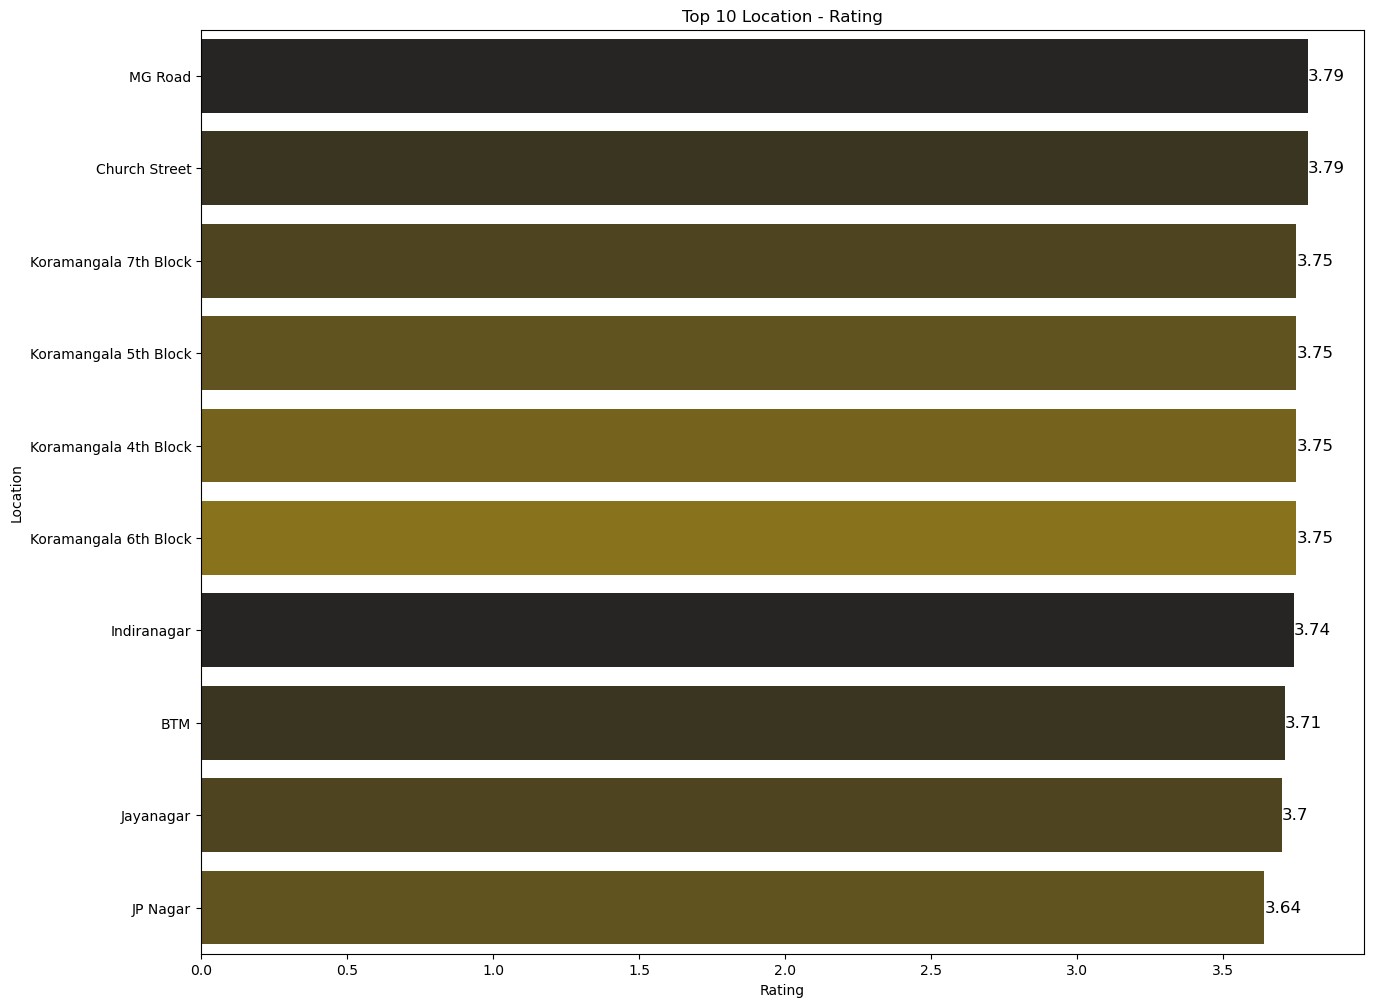

In [235]:
loc_rating = df['rating'].groupby(df['location'],sort=True)
dict_1={}
for i,j in df['location'].value_counts()[:10].to_dict().items():
    dict_1[i]=round(loc_rating.get_group(i).mean(),2)
cost_df = pd.DataFrame(list(dict_1.items()),columns=['Location',"Rating"])


fig , ax = plt.subplots(figsize=(15,12))
ax1 = sns.barplot(data = cost_df.sort_values(by=['Rating'],ascending=False),
            x = 'Rating',y = 'Location',palette=sns.dark_palette("#9A7D0A"), 
            estimator="mean", errorbar=None)
ax1.bar_label(ax.containers[0], fontsize=12)
plt.title('Top 10 Location - Rating')

Text(0.5, 1.0, 'Top 10 Restaurants - Average cost(2 people)')

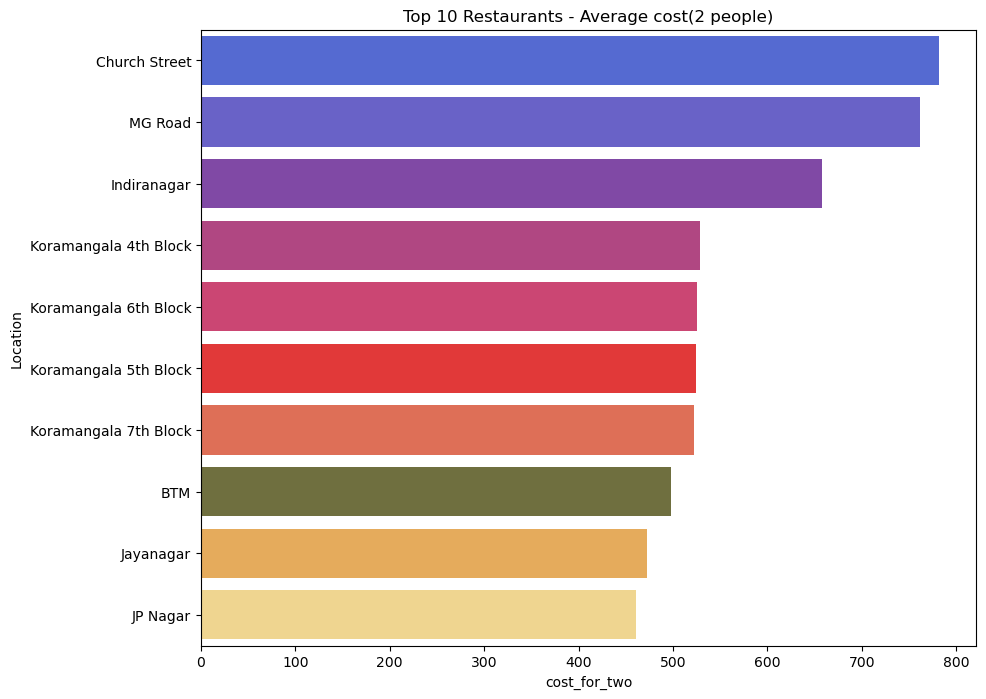

In [239]:
loc_cost = df['cost_for_two'].groupby(df['location'],sort=True)
dict_1={}
for i,j in df['location'].value_counts()[:10].to_dict().items():
    dict_1[i]=round(loc_cost.get_group(i).mean(),2)
cost_df = pd.DataFrame(list(dict_1.items()),columns=['Location',"cost_for_two"])
cols = ['#405DE6', '#5B51D8', '#833AB4', '#C13584', '#E1306C',
        '#FD1D1D', '#F56040', '#777737', '#FCAF45', '#FFDC80']


fig , ax = plt.subplots(figsize=(10,8))
sns.barplot(data = cost_df.sort_values(by=['cost_for_two'],ascending=False),
            x = 'cost_for_two',y = 'Location',palette=cols)
plt.title('Top 10 Location - Average cost(2 people)')

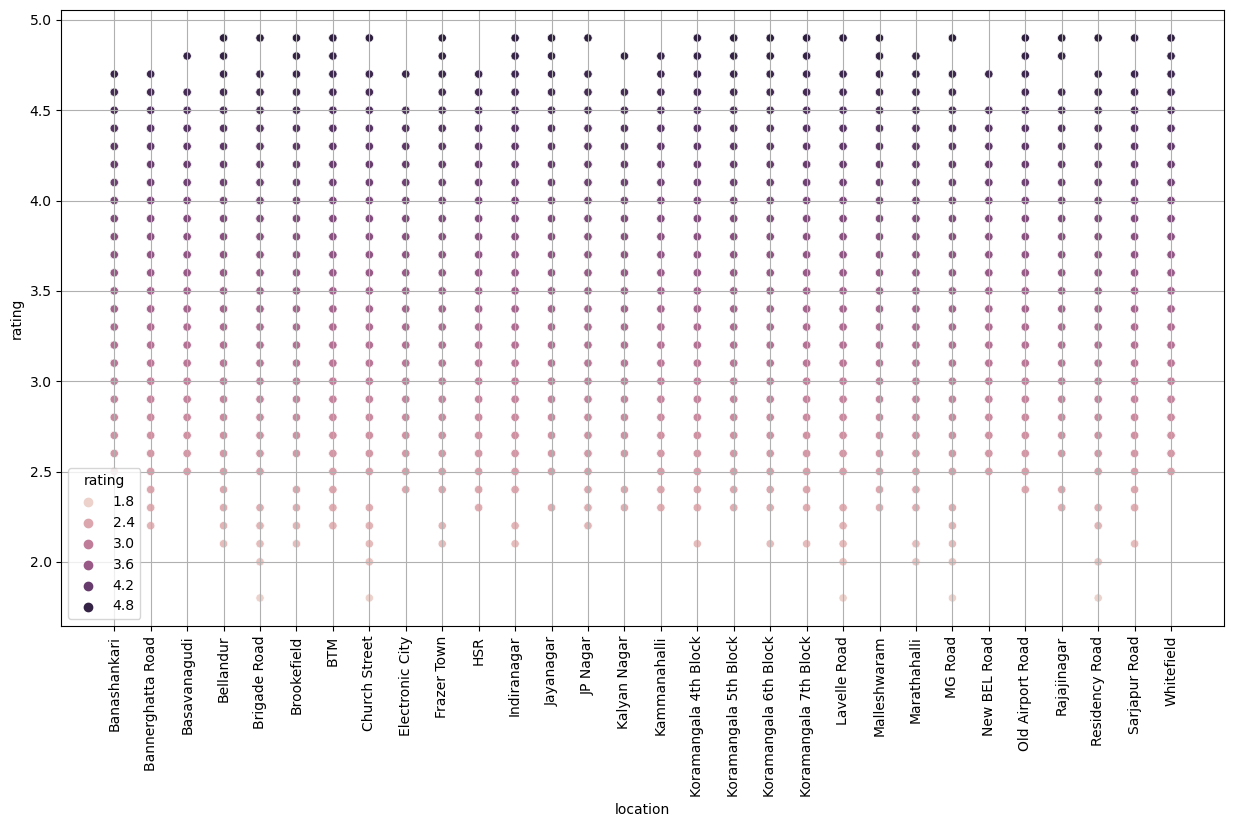

In [107]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='location', y='rating', hue = 'rating')
plt.xticks(rotation=90)
plt.grid()